In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tabulate import tabulate
from scipy.linalg import svd

In [3]:
def show(image):
    """Show an image"""
    img = plt.imshow(image)
    img.set_cmap("gray")
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(svd_result):
    U, s, VT = svd_result
    return np.dot(U, np.dot(np.diag(s), VT))

(30, 30)


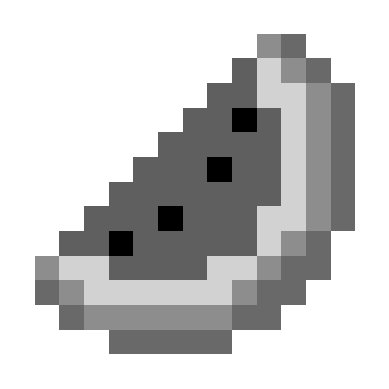

=== U ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.2  -0    -0.1  -0.2  -0.2   0    -0.1   0.1   0    -0.1  -0     0.1   0.2   0.2  -0    -0     0.1  -0    -0.1   0.1   0.1  -0    -0    -0     0    -0    -0    -0     0.8
-0.2  -0.2  -0    -0.1  -0.2  -0.2   0    -0.1   0.1   0    -0.1  -0     0.1   0.2   0.4  -0.1   0.2  -0     0.1  -0.3   0.1   0.3  -0.4  -0    -0     0    -0    -0     0    -0.4
-0.2  -0.3   0    -0.1   0.1   0.1   0.1   0.1  -0.4  -0.3   0.2   0.1   0    -0.1  -0    -0.4  -0.1  -0.4  -0.4  -0.1   0     0    -0    -0    -0     0    -0    -0     0     0
-0.2  -0.3   0    -0.1   0.1   0.1   0.1   0.1  -0.4  -0.3   0.2   0.1   0    -0.1   0     0.4   0.1   0.4   0.4   0.1  -0    -0     0     0     0    -0    -0     0    -0    -0
-0.2  -0.2   0.1   0.2  -0.2   0.3  -0    -0     0.1  -0.1  -0.3   0.1  -0.4  -0    -0.2  -0.5  -0.

In [18]:
image = to_gray(imread('images/watermelon.png'))
image = cv2.resize(image, (30, 30), interpolation=0)
image*=255
print(image.shape)
show(image)
print_svd(svd(image))

In [5]:
for i in range(6):
    for j in range(6):
        U, s, VT = svd(image[i*5:i*5+5, j*5:j*5+5])
        printf(U)

----  ----  ----  ----  ----
-0.4   0.9   0     0     0
-0.4  -0.2  -0.5  -0.5  -0.5
-0.4  -0.2  -0.2  -0.2   0.8
-0.4  -0.2  -0.2   0.8  -0.2
-0.4  -0.2   0.8  -0.2  -0.2
----  ----  ----  ----  ----
----  ----  ----  ----  ----
-0.4   0.9   0     0     0
-0.4  -0.2  -0.5  -0.5  -0.5
-0.4  -0.2  -0.2  -0.2   0.8
-0.4  -0.2  -0.2   0.8  -0.2
-0.4  -0.2   0.8  -0.2  -0.2
----  ----  ----  ----  ----
----  ----  ----  ----  ----
-0.4   0.9   0     0     0
-0.4  -0.2  -0.5  -0.5  -0.5
-0.4  -0.2  -0.2  -0.2   0.8
-0.4  -0.2  -0.2   0.8  -0.2
-0.4  -0.2   0.8  -0.2  -0.2
----  ----  ----  ----  ----
----  ----  ----  ----  ----
-0.5  -0.2   0.9   0.1   0
-0.5  -0.2  -0.4   0.8   0
-0.5  -0.2  -0.2  -0.4  -0.7
-0.5  -0.2  -0.2  -0.5   0.7
-0.4   0.9  -0    -0    -0
----  ----  ----  ----  ----
----  ----  ----  ----  ----
-0.6   0.2   0.4   0.6  -0.3
-0.6   0.2   0.4  -0.6   0.3
-0.3  -0.6  -0.2   0.3   0.6
-0.3  -0.6  -0.2  -0.3  -0.6
-0.4   0.5  -0.8   0     0
----  ----  ----  ----  ----

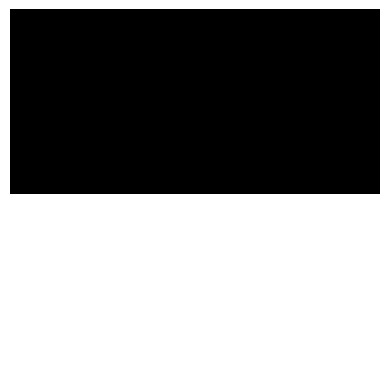

In [6]:
show (np.array([[1,1],[2,2]]) @ np.array([[1,1],[0,0]]))

In [7]:
a = np.array([[1,2],[0, 3]])
printf(a)

-  -
1  2
0  3
-  -


In [8]:
u, s, v = svd(a)

In [9]:
print_svd((u, s, v))

=== U ===
---  ----
0.6  -0.8
0.8   0.6
---  ----
=== sigma ===
---  ---
3.7  0
0    0.8
---  ---
=== V transpose ===
----  ---
 0.2  1
-1    0.2
----  ---


In [10]:
s[0] = 4.8

In [11]:
print_svd((u, s, v))

=== U ===
---  ----
0.6  -0.8
0.8   0.6
---  ----
=== sigma ===
---  ---
4.8  0
0    0.8
---  ---
=== V transpose ===
----  ---
 0.2  1
-1    0.2
----  ---


In [12]:
b = product_svd((u, s, v))
printf(b)

---  ---
1.1  2.7
0.1  3.9
---  ---


In [13]:
print_svd(svd(b))

=== U ===
---  ----
0.6   0.8
0.8  -0.6
---  ----
=== sigma ===
---  ---
4.8  0
0    0.8
---  ---
=== V transpose ===
---  ----
0.2   1
1    -0.2
---  ----


## Resources
* https://www.researchgate.net/publication/339224683_Digital_Image_Watermarking_using_Singular_Value_Decomposition
* https://www.ijcaonline.org/ecot/number1/SPE134T.pdf
* https://link.springer.com/article/10.1007/s12046-012-0089-x